In [ ]:
pip install dlib

In [ ]:
import dlib
import cv2
import numpy as np

detector = dlib.get_frontal_face_detector()

known_face_encodings = []
known_face_labels = []

known_face_paths = ["Amitabh Bachchan_1.jpg", "Amitabh Bachchan_10.jpg", "Tom Cruise_0.jpg", "Tom Cruise_12.jpg", "Vijay Deverakonda_1.jpg", "Vijay Deverakonda_100.jpg", "Virat Kohli_16.jpg", "Virat Kohli_21.jpg"]
known_face_labels = ["Amitabh Bachchan", "Amitabh Bachchan", "Tom Cruise", "Tom Cruise", "Vijay Deverakonda", "Vijay Deverakonda", "Virat Kohli", "Virat Kohli"]

for path, label in zip(known_face_paths, known_face_labels):
    image = cv2.imread(path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_locations = detector(rgb_image, 1)
    if len(face_locations) == 1:
        top, right, bottom, left = face_locations[0].top(), face_locations[0].right(), face_locations[0].bottom(), face_locations[0].left()
        face_encoding = np.array([top, right, bottom, left])
        known_face_encodings.append(face_encoding)
        known_face_labels.append(label)

input_image = cv2.imread("Vijay Deverakonda_1.jpg")
rgb_input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

face_locations = detector(rgb_input_image, 1)

for face_location in face_locations:
    top, right, bottom, left = face_location.top(), face_location.right(), face_location.bottom(), face_location.left()
    face_encoding = np.array([top, right, bottom, left])

    distances = np.linalg.norm(np.array(known_face_encodings) - face_encoding, axis=1)
    min_distance_index = np.argmin(distances)
    min_distance = distances[min_distance_index]

    threshold = 100

    if min_distance <= threshold:
        label = known_face_labels[min_distance_index]
    else:
        label = "Unknown"

    cv2.rectangle(input_image, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(input_image, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
from google.colab.patches import cv2_imshow

resized_image = cv2.resize(input_image, (500, 300))

cv2_imshow(resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
face_locations
distances

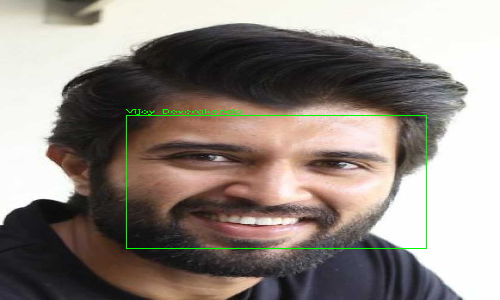

In [ ]:
from google.colab.patches import cv2_imshow

resized_image = cv2.resize(input_image, (500, 300))

cv2_imshow(resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
face_locations

rectangles[[(280, 576) (946, 1242)]]

In [ ]:
distances

array([1107.61184537,  655.22057355,  906.71384681, 1345.7198817 ,
          0.        , 1206.55294123,  668.51028414, 1250.95723348])